In [1]:
%matplotlib inline

import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st 
import warnings
warnings.filterwarnings('ignore')

from sklearn import datasets, linear_model

sns.set()

# We load our data and visualize the first 50 lines.
data = pd.read_csv("movie_metadata.csv")
print(data.columns.values)
data.head(50)

['color' 'director_name' 'num_critic_for_reviews' 'duration'
 'director_facebook_likes' 'actor_3_facebook_likes' 'actor_2_name'
 'actor_1_facebook_likes' 'gross' 'genres' 'actor_1_name' 'movie_title'
 'num_voted_users' 'cast_total_facebook_likes' 'actor_3_name'
 'facenumber_in_poster' 'plot_keywords' 'movie_imdb_link'
 'num_user_for_reviews' 'language' 'country' 'content_rating' 'budget'
 'title_year' 'actor_2_facebook_likes' 'imdb_score' 'aspect_ratio'
 'movie_facebook_likes']


,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000
6,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,...,1902.0,English,USA,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0
7,Color,Nathan Greno,324.0,100.0,15.0,284.0,Donna Murphy,799.0,200807262.0,Adventure|Animation|Comedy|Family|Fantasy|Musi...,...,387.0,English,USA,PG,260000000.0,2010.0,553.0,7.8,1.85,29000
8,Color,Joss Whedon,635.0,141.0,0.0,19000.0,Robert Downey Jr.,26000.0,458991599.0,Action|Adventure|Sci-Fi,...,1117.0,English,USA,PG-13,250000000.0,2015.0,21000.0,7.5,2.35,118000
9,Color,David Yates,375.0,153.0,282.0,10000.0,Daniel Radcliffe,25000.0,301956980.0,Adventure|Family|Fantasy|Mystery,...,973.0,English,UK,PG,250000000.0,2009.0,11000.0,7.5,2.35,10000


(5043, 28)

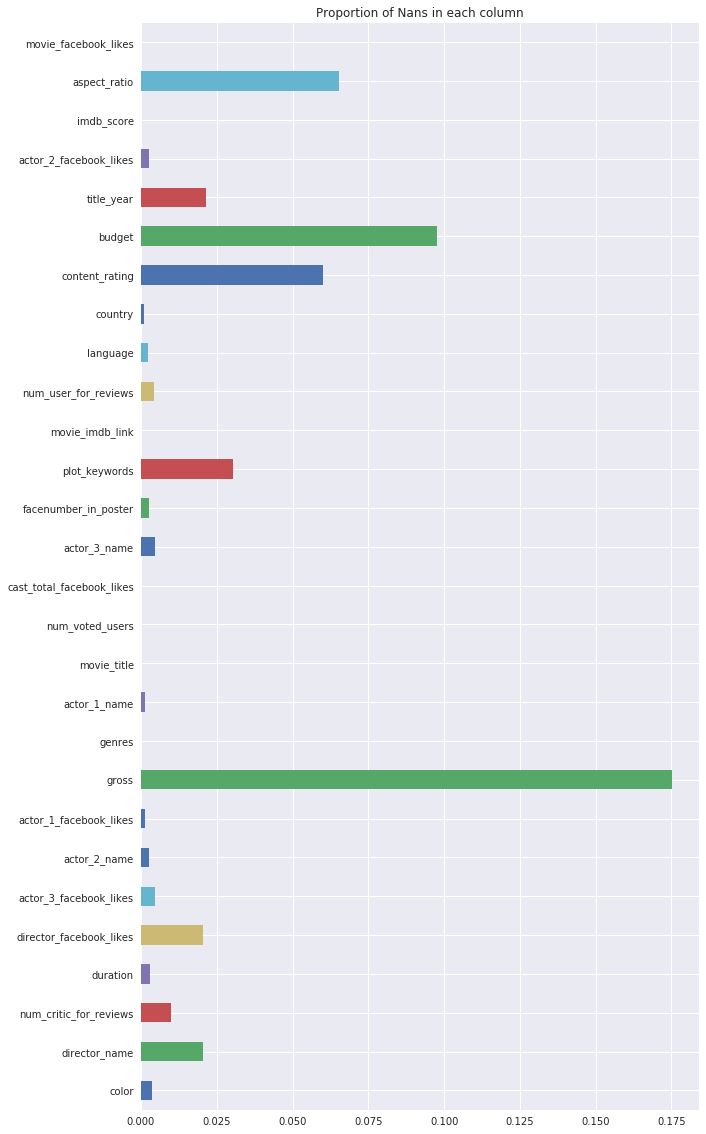

In [2]:
# We visualize, using a barplot, Nans proportion in each column of our dataset.

plt.figure(figsize=(10, 20))
data.isnull().mean(axis=0).plot.barh()
plt.title("Proportion of Nans in each column")
data.shape

# Cleaning Dataset

In [3]:
# We get rid of features that do not agree with our problem or that we do not need.

data = data.drop(columns=["gross","director_facebook_likes","actor_1_facebook_likes","actor_2_facebook_likes",
                   "actor_3_facebook_likes", "movie_facebook_likes", "cast_total_facebook_likes","budget",
                          "facenumber_in_poster", "content_rating", "movie_imdb_link", "aspect_ratio"])

(5043, 16)

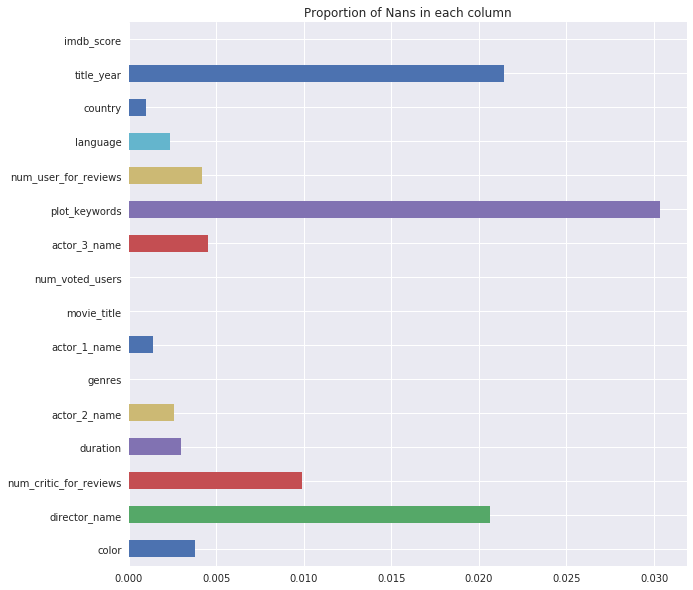

In [4]:
plt.figure(figsize=(10, 10))
data.isnull().mean(axis=0).plot.barh()
plt.title("Proportion of Nans in each column")
data.shape

In [5]:
data["title_year"].describe()

count    4935.000000
mean     2002.470517
std        12.474599
min      1916.000000
25%      1999.000000
50%      2005.000000
75%      2011.000000
max      2016.000000
Name: title_year, dtype: float64

In [6]:
# Replacing unknown title_year values with title_year's median which is 2005

FILL_VALUE = 2005
data["title_year"] = data["title_year"].fillna(FILL_VALUE)

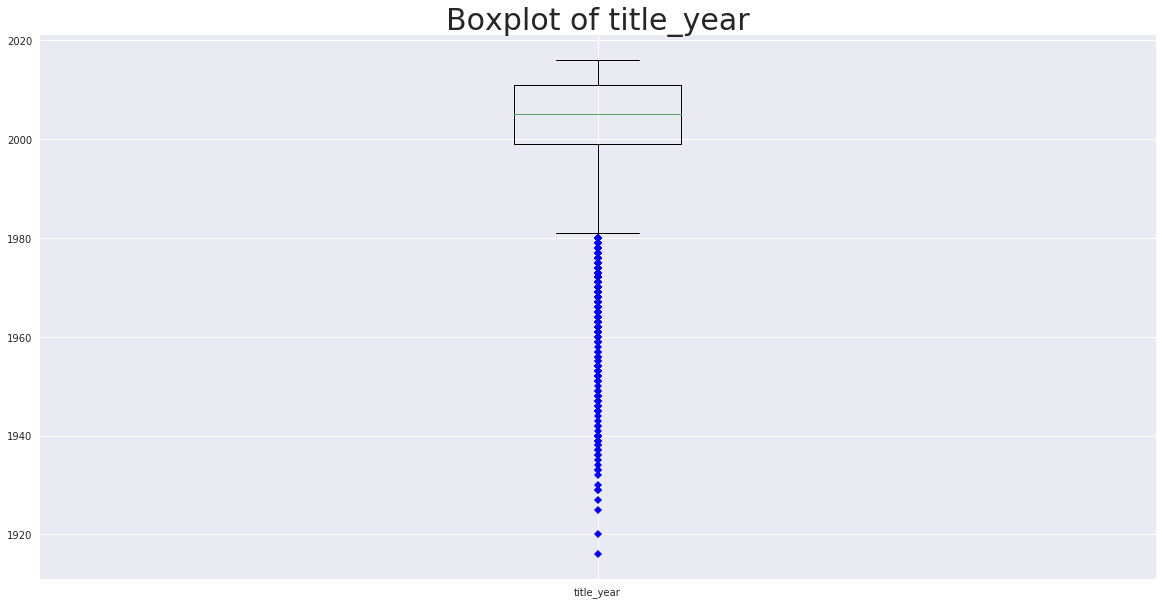

count    5043.000000
mean     2002.524688
std        12.345705
min      1916.000000
25%      1999.000000
50%      2005.000000
75%      2011.000000
max      2016.000000
Name: title_year, dtype: float64

In [7]:
plt.figure(figsize=(20, 10))
plt.title("Boxplot of title_year", fontsize=30)

green_diamond = dict(markerfacecolor='b', marker='D')

plot= plt.boxplot(data["title_year"], flierprops=green_diamond, labels=['title_year'])
plt.show()

data["title_year"].describe()

slope =  [0.00054702]
intercept =  93.96857211016166
The linear correlation coefficient between num_voted_users and num_critic_for_reviews  0.6249433734446799


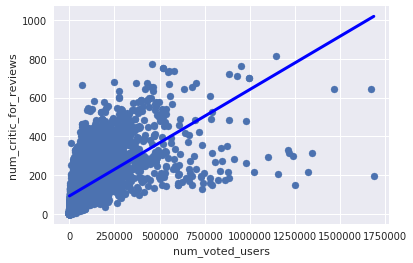

In [8]:
# Linear regression between num_voted_users and num_critic_for_reviews

# We delete the Nan present in num_critic_for_reviews to be able to make the regression

data1 = data.dropna(axis=0, subset=["num_critic_for_reviews"])
x = data1["num_voted_users"]
y = data1["num_critic_for_reviews"]

plt.scatter(x,y)

regr = linear_model.LinearRegression()
regr.fit(x[:,np.newaxis], y)

x_test = np.linspace(np.min(x), np.max(x), 100)

ax = plt.axes()
ax = ax.set(xlabel="num_voted_users", ylabel="num_critic_for_reviews")
plt.plot(x_test, regr.predict(x_test[:,np.newaxis]), color='blue', linewidth=3)

print ('slope = ', regr.coef_)
print ('intercept = ', regr.intercept_)

coef = regr.coef_
intercept = regr.intercept_
print("The linear correlation coefficient between num_voted_users and num_critic_for_reviews ",
      st.pearsonr(data1["num_voted_users"], data1["num_critic_for_reviews"])[0])

slope =   [0.00217629]
intercept =  89.9234268547761
The linear correlation coefficient between num_voted_users and num_user_for_reviews  0.7984062167010435


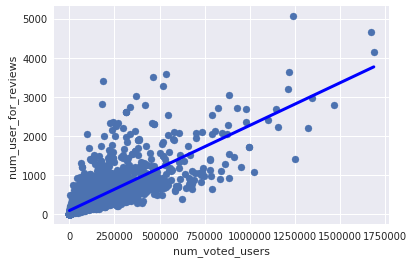

In [9]:
# Linear regression between num_voted_users and num_user_for_reviews

# We delete the Nan present in num_user_for_reviews to be able to make the regression

data1 = data.dropna(axis=0, subset=["num_user_for_reviews"])
x = data1["num_voted_users"]
y = data1["num_user_for_reviews"]

plt.scatter(x,y)

regr = linear_model.LinearRegression()
regr.fit(x[:,np.newaxis], y)

x_test = np.linspace(np.min(x), np.max(x), 100)

ax = plt.axes()
ax = ax.set(xlabel="num_voted_users", ylabel="num_user_for_reviews")
plt.plot(x_test, regr.predict(x_test[:,np.newaxis]), color='blue', linewidth=3)

print ('slope =  ', regr.coef_)
print ('intercept = ', regr.intercept_)

coef = regr.coef_
intercept = regr.intercept_
print("The linear correlation coefficient between num_voted_users and num_user_for_reviews ",
      st.pearsonr(data1["num_voted_users"], data1["num_user_for_reviews"])[0])

In [10]:
# Using a linear regression between num_user_for_reviews and num_voted_users on one side,
# and between num_critic_for_reviews num_voted_users of the other, we manage to complete the missing values
# of num_critic_for_reviews and num_user_for_reviews

def variable_linreg_imputation(dataframe, col_to_predict, ref_col):
    ''' Using a linear regression between 2 columns of a dataframe,
        we manage to complete the missing values of one of them
    '''
    
    regr = linear_model.LinearRegression()
    test = dataframe[[col_to_predict,ref_col]].dropna(how='any', axis = 0)
    X = np.array(test[ref_col])
    Y = np.array(test[col_to_predict])
    X = X.reshape(len(X),1)
    Y = Y.reshape(len(Y),1)
    regr.fit(X, Y)
    
    test = dataframe[dataframe[col_to_predict].isnull() & dataframe[ref_col].notnull()]
    for index, row in test.iterrows():
        value = float(regr.predict(row[ref_col]))
        dataframe.set_value(index, col_to_predict, value)

variable_linreg_imputation(data, "num_user_for_reviews", "num_voted_users")
variable_linreg_imputation(data, "num_critic_for_reviews", "num_voted_users")

In [11]:
data["color"].value_counts(1)

Color               0.9584
 Black and White    0.0416
Name: color, dtype: float64

In [12]:
# We replace the nan with Color which is the most represented color (by far) in our film base.

FILL_VALUE = "Color"
data["color"] = data["color"].fillna(FILL_VALUE)

In [13]:
data["language"].value_counts(1)

English       0.935003
French        0.014510
Spanish       0.007951
Hindi         0.005565
Mandarin      0.005168
German        0.003777
Japanese      0.003578
Russian       0.002186
Italian       0.002186
Cantonese     0.002186
Korean        0.001590
Portuguese    0.001590
Hebrew        0.000994
Swedish       0.000994
Arabic        0.000994
Danish        0.000994
Norwegian     0.000795
Dutch         0.000795
Polish        0.000795
Persian       0.000795
Chinese       0.000596
Thai          0.000596
Indonesian    0.000398
None          0.000398
Dari          0.000398
Zulu          0.000398
Romanian      0.000398
Icelandic     0.000398
Aboriginal    0.000398
Filipino      0.000199
Tamil         0.000199
Mongolian     0.000199
Aramaic       0.000199
Panjabi       0.000199
Vietnamese    0.000199
Kannada       0.000199
Urdu          0.000199
Bosnian       0.000199
Greek         0.000199
Swahili       0.000199
Kazakh        0.000199
Hungarian     0.000199
Czech         0.000199
Maya       

In [14]:
# We replace the nan with English which is the most represented language in our film base.

FILL_VALUE = "English"
data["language"] = data["language"].fillna(FILL_VALUE)

In [15]:
# We replace the nan by USA which is the most represented country in our film base.

FILL_VALUE = "USA"
data["country"] = data["country"].fillna(FILL_VALUE)

In [16]:
# The Nan are replaced by the average of the feature duration

fill_value = int(data["duration"].mean())
data["duration"] = data["duration"].fillna(fill_value)

In [17]:
data = data.dropna(axis=0, subset=["plot_keywords"])

# For the remaining features, only nan’s are deleted without adding any value.
for i in ["actor_1_name", "actor_2_name", "actor_3_name", "director_name"]:
    
    data[i] = data[i].fillna(" ")

In [18]:
# Gztting rid of the duplicated movies.

print("Nombre total de films: ", data.shape[0])
data = data.drop_duplicates(subset="movie_title")
print("Nombre de films sans les doublons: ", data.shape[0])

Nombre total de films:  4890
Nombre de films sans les doublons:  4766


# Exploratory Data Analysis

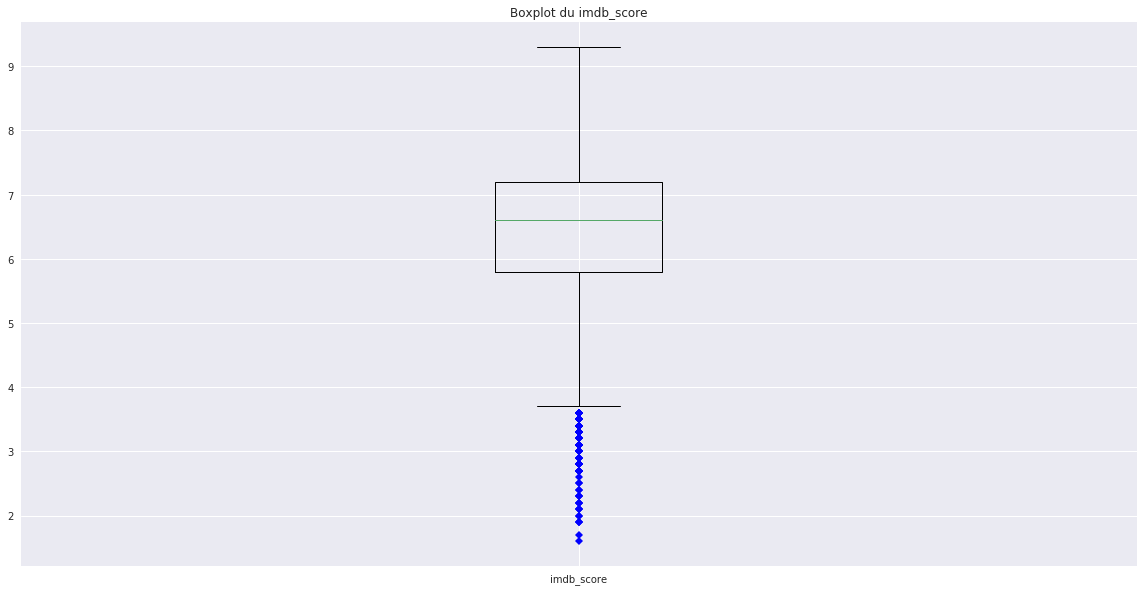

count    4766.000000
mean        6.448552
std         1.116142
min         1.600000
25%         5.800000
50%         6.600000
75%         7.200000
max         9.300000
Name: imdb_score, dtype: float64 

count    4766.000000
mean      141.074888
std       119.760284
min         1.000000
25%        53.000000
50%       111.000000
75%       194.000000
max       813.000000
Name: num_critic_for_reviews, dtype: float64 

count    4766.000000
mean      274.773070
std       375.418753
min         1.000000
25%        70.250000
50%       159.000000
75%       327.000000
max      5060.000000
Name: num_user_for_reviews, dtype: float64 



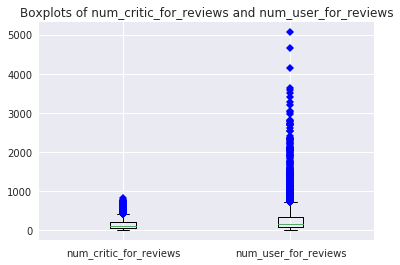

In [19]:
# Boxplot of imdb_score

plt.figure(figsize=(20, 10))
plt.title("Boxplot du imdb_score")

green_diamond = dict(markerfacecolor='b', marker='D')

plot= plt.boxplot(data["imdb_score"], flierprops=green_diamond, labels=['imdb_score'])
plt.show()

# Boxplots of num_critic_for_reviews and de num_user_for_reviews

plt.title("Boxplots of num_critic_for_reviews and num_user_for_reviews")

databox = [data["num_critic_for_reviews"], data["num_user_for_reviews"]]
labels = ("num_critic_for_reviews", "num_user_for_reviews")
plot= plt.boxplot(databox, flierprops=green_diamond, labels=labels)

print(data["imdb_score"].describe(),"\n")

for i in labels:
    print(data[i].describe(),"\n")

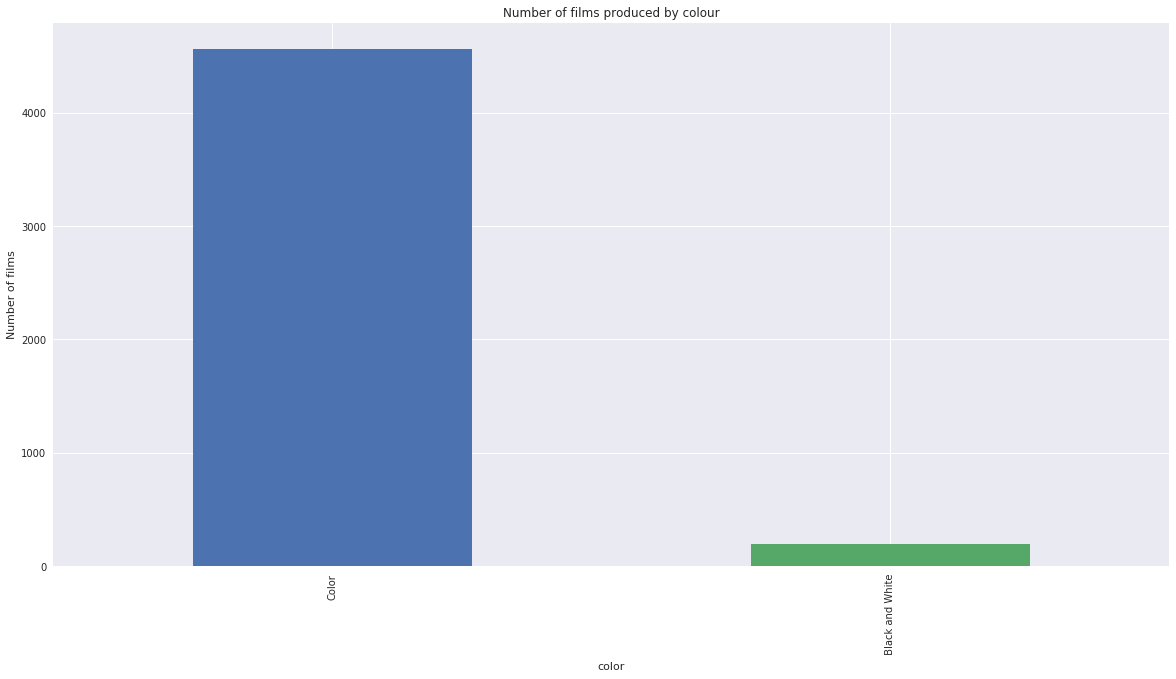

In [20]:
# Graphic showing the number of films produced by colour

color = data.groupby("color")

plt.figure(figsize=(20, 10))
plt.title("Number of films produced by colour")

ax = plt.axes()
ax = ax.set(xlabel="color", ylabel='Number of films')
color.size().sort_values(ascending=False).plot.bar()


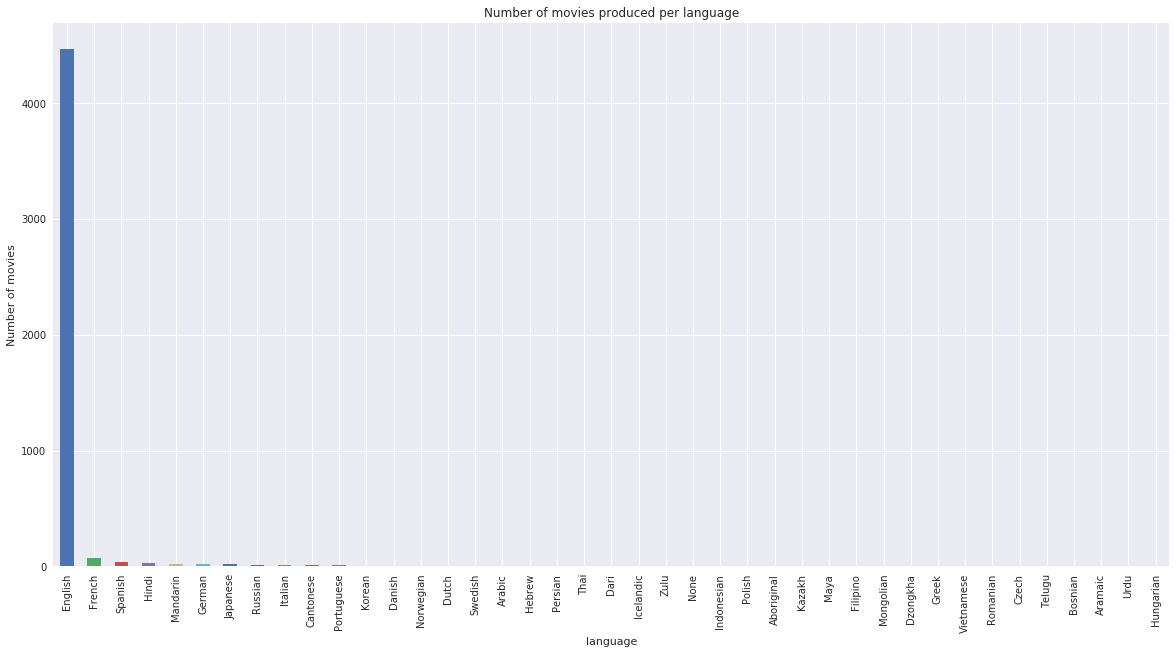

In [21]:
#Graph showing the number of movies produced per language

language = data.groupby("language")

plt.figure(figsize=(20, 10))
plt.title("Number of movies produced per language")

ax = plt.axes()
ax = ax.set(xlabel="Language", ylabel='Number of movies')
language.size().sort_values(ascending=False).plot.bar()

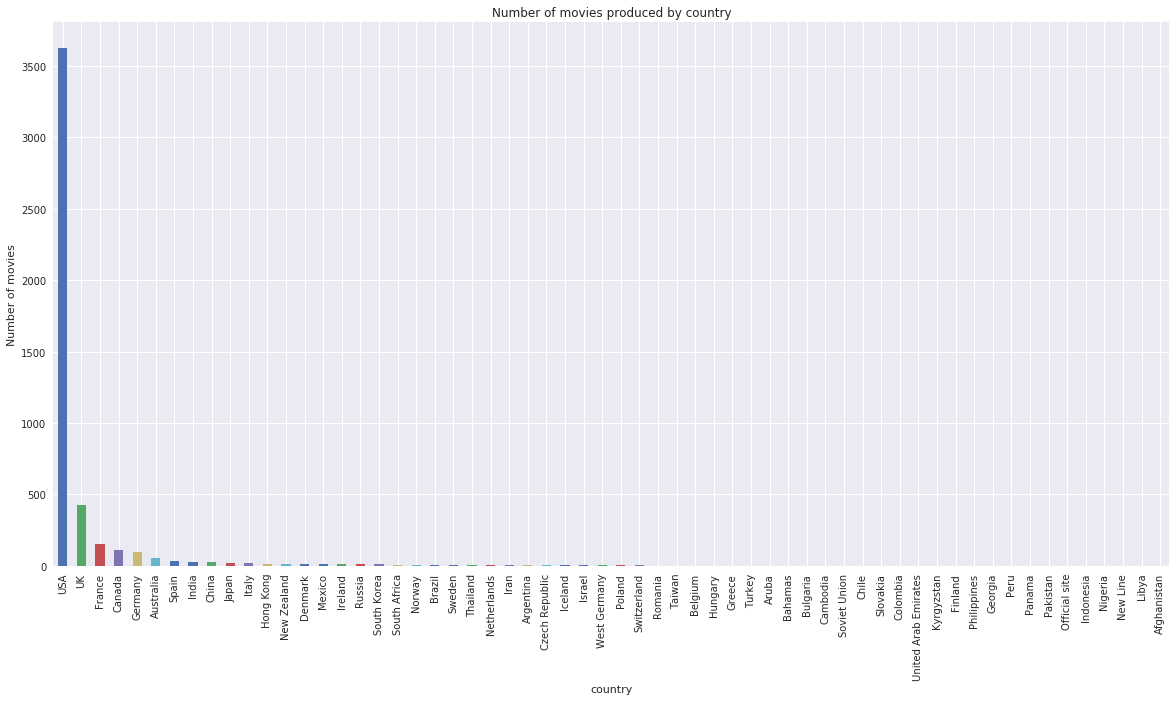

In [22]:
# Graph showing the number of movies produced by country

country = data.groupby("country")

plt.figure(figsize=(20, 10))
plt.title("Number of movies produced by country")

ax = plt.axes()
ax = ax.set(xlabel="Country", ylabel='Number of movies')
country.size().sort_values(ascending=False).plot.bar()

In [23]:
set_keywords = set()

# Making a list of the different keywords in the scenarios
for liste_keywords in data['plot_keywords'].str.split('|').values:
    
    if isinstance(liste_keywords, float): continue 
    set_keywords = set_keywords.union(liste_keywords)

    
def count_word(data, ref_col, liste): 
    ''' Count the number of occurrences for each keyword
    '''
    
    keyword_count = dict()
    
    for s in liste: keyword_count[s] = 0
        
    for liste_keywords in data[ref_col].str.split('|'):        
        if type(liste_keywords) == float and pd.isnull(liste_keywords): 
            continue
            
        for s in [s for s in liste_keywords if s in liste]: 
            
            if pd.notnull(s):
                keyword_count[s] += 1
    
    # conversion of our dictionary into a list
    keyword_occurences = []
    for k,v in keyword_count.items():
        
        keyword_occurences.append([k,v])
    keyword_occurences.sort(key = lambda x:x[1], reverse = True)
    
    return keyword_occurences, keyword_count

keyword_occurences, dum = count_word(data, 'plot_keywords', set_keywords)
keyword_occurences[:5]


[['love', 191],
 ['friend', 164],
 ['murder', 157],
 ['death', 129],
 ['police', 125]]

Text(0.5,1,'Words most evoked in the scenarios')

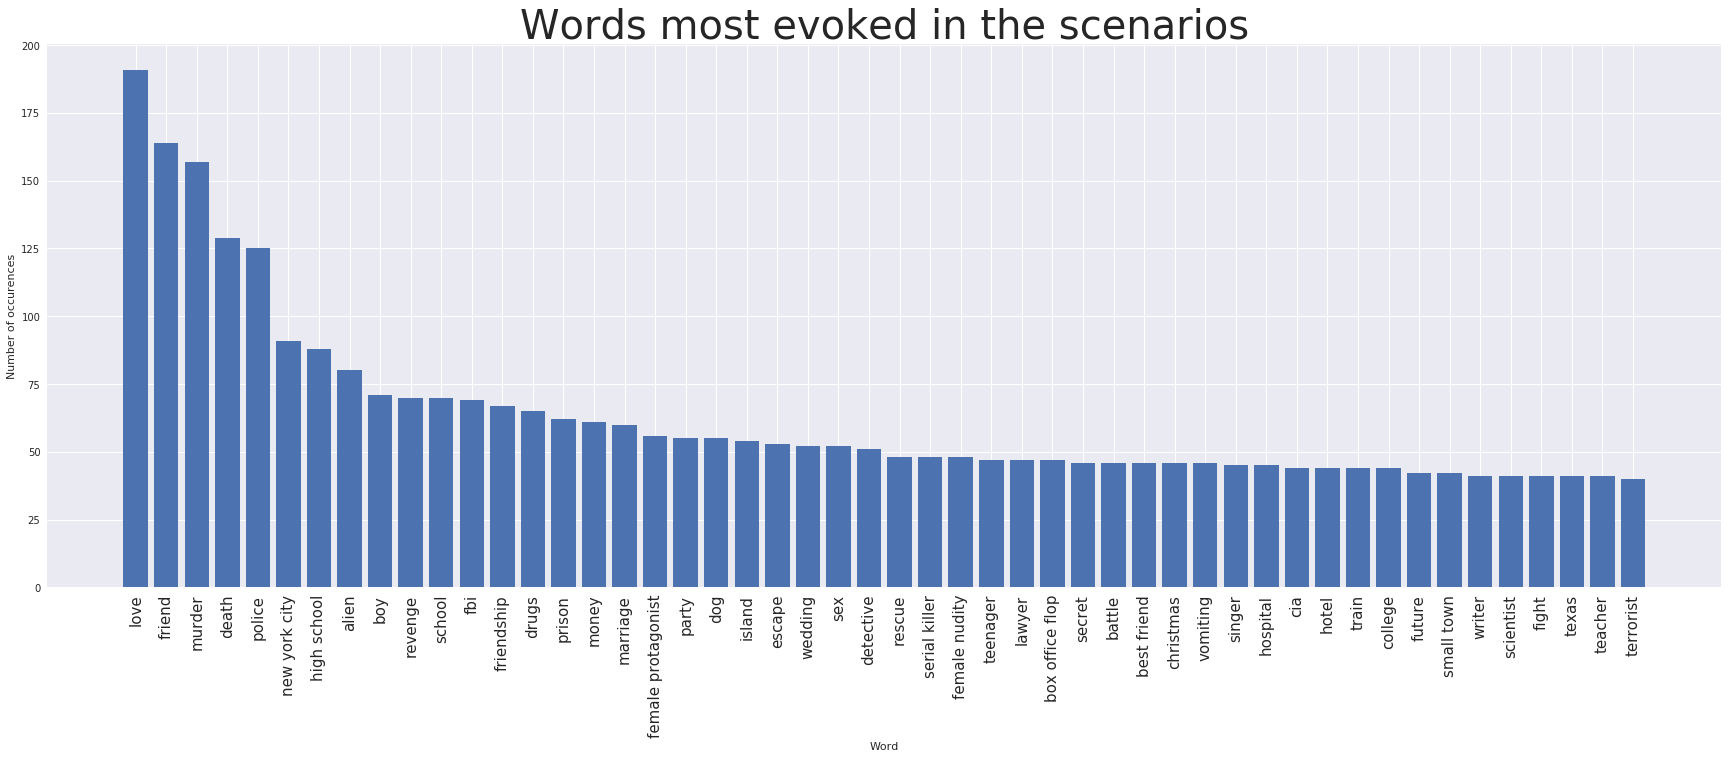

In [24]:
words = dict()
trunc_occurences = keyword_occurences[0:50]

for s in trunc_occurences:
    words[s[0]] = s[1]

# Graph showing the words most mentioned in the scenarios

plt.figure(figsize=(30, 10))
y_axis = [i[1] for i in trunc_occurences]
x_axis = [k for k,i in enumerate(trunc_occurences)]
label_x = [i[0] for i in trunc_occurences]
plt.xticks(rotation=90, fontsize = 15)
ax = plt.axes()
ax = ax.set(xlabel="Word", ylabel="Number of occurences")

plt.bar(label_x, y_axis)
plt.title("Words most evoked in the scenarios",fontsize = 40)

Text(0.5,1,'The most represented genres among the movies')

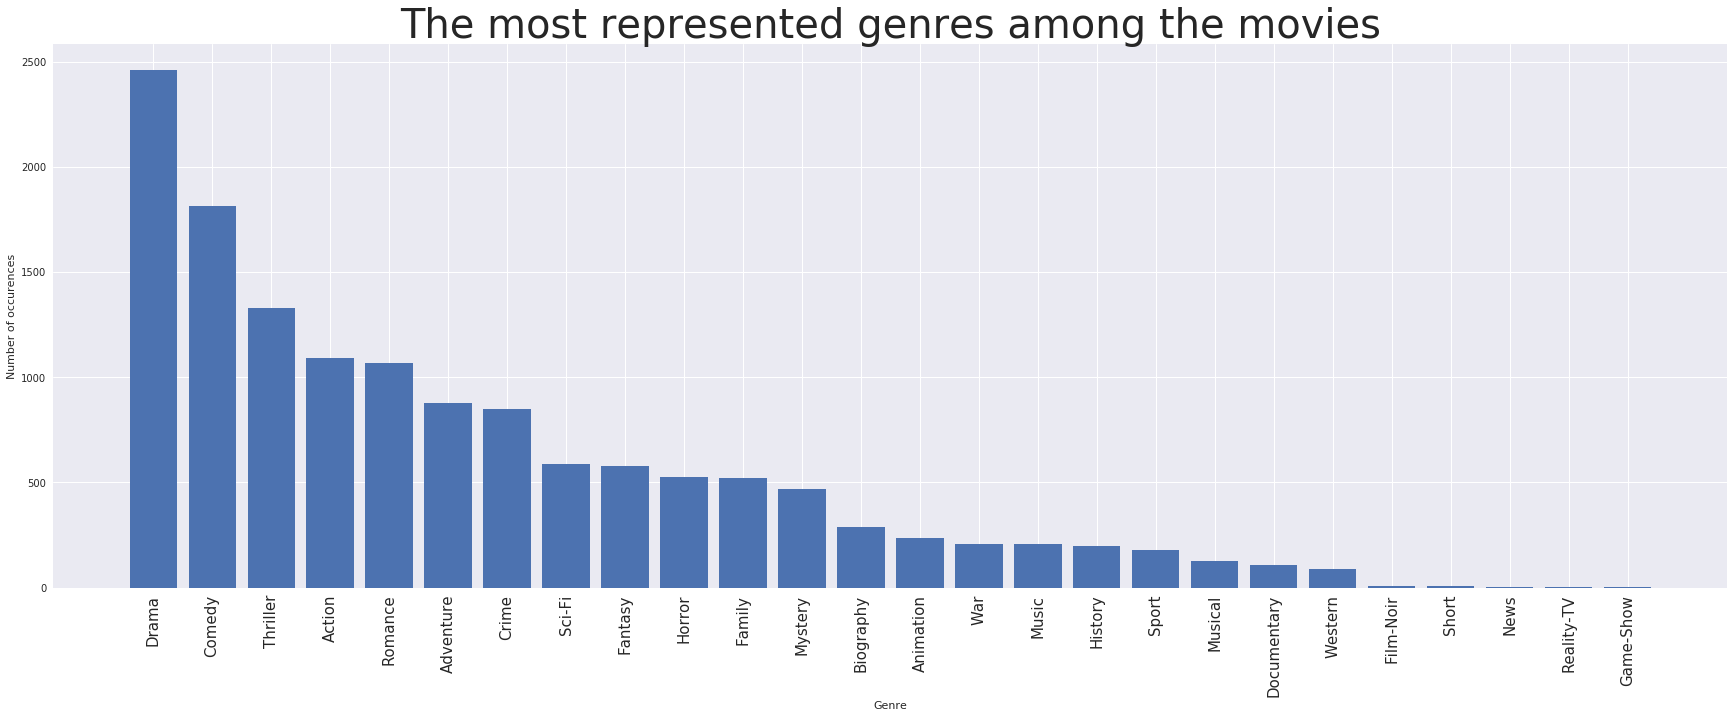

In [25]:
genre_labels = set()

for s in data['genres'].str.split('|').values:
    genre_labels = genre_labels.union(set(s))

keyword_occurences, dum = count_word(data, 'genres', genre_labels)

words = dict()
trunc_occurences = keyword_occurences[0:50]

for s in trunc_occurences:
    words[s[0]] = s[1]

# Graphic showing the genres most present in the films

plt.figure(figsize=(30, 10))
y_axis = [i[1] for i in trunc_occurences]
x_axis = [k for k,i in enumerate(trunc_occurences)]
label_x = [i[0] for i in trunc_occurences]
plt.xticks(rotation=90, fontsize = 15)
ax = plt.axes()
ax = ax.set(xlabel="Genre", ylabel="Number of occurences")

plt.bar(label_x, y_axis)
plt.title("The most represented genres among the movies",fontsize = 40)

In [26]:
# Exporting the cleaned dataset

data.to_csv('cleaned_data_films.csv',encoding='utf-8', index=False)